# Investigating Fandango Movie Ratings

In October 2015, Walt Hickey (a data journalist) found out that Fandango movie rating system was biased and dishonest. He discovered that the actual rating and the rating that users see are different, what he found by looking in the HTML of the page. Almost in all cases the rating was rounded up to the half star (e.g. from 4.1 to 4.5). In 8% of the cases the rounding up was done almost to the one star. Fandango replied that the problem was made because of a bug in their system and that they will fix it. It's hard to say whether problem was solved, because the rating is not displayed in the HTML pages anymore.

The goal of this project is to whether there has been any change in Fandango's rating system after Hickey's analysis. To achieve that we will analyze more recent movie ratings data.

## Reading and exploring the data

To be able to analyze the changes in Fandango's rating system we will use two data sources:
- First from Walt Hickey, who made the data he analyzed publicly available
- Second from one of Dataquest's team members, who collected movie ratings data for movies released in 2016 and 2017

In [55]:
import pandas as pd
pd.options.display.max_columns=99

previous_data = pd.read_csv(r"Data\fandango_score_comparison.csv")
after_data = pd.read_csv(r"Data\movie_ratings_16_17.csv")

previous_data.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [56]:
after_data.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


Now we are going to isolate the data about Fandango's ratings that we are interested in.

In [57]:
previous_fandango = previous_data[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
after_fandango = after_data[['movie', 'year', 'fandango']].copy()

previous_fandango.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [58]:
after_fandango.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


As we mentioned at the beginning to analyze Fandango movie ratings we will need two data sources, before and after the rating change. We need to make sure that both samples are representative, otherwise the conclusion could be wrong. 
The sample that was created before the rating was changed was not random, because of two factors, base on which the movies were selected:
- at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015),
- tickets on sale in 2015.
It looks like this sample is not representative of the entire population. 

For the data collected after the rating change we also have two factors for movies selection:
- a considerable number of votes and reviews (unclear how many),
- the movie must have been released in 2016 or later.

Thus this one looks also not representative. Both samples were created by subjective sampling method and they are not useful for our purpose.
The best solution for us in that case is to change the goal of our analysis. Our new goal will be:

**Determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.**

It is close enough to our initial goal and we still can use our data. Our two populations of interest will be:
- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

As a popular movie we will define movie with at least 30 fan ratings. As the first data source mention the criteria of 30 fan ratings, the second one doesn't specify the number of ratings. Thus to make sure that our second sample is representative we will check the popularity of 10 randomly selected movies.

In [59]:
after_fandango.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Now we are going to check number of ratings on Fandango's website. As of August 2018, these are the fan ratings we found:
- **Mechanic: Resurrection** - 2248 fan ratings
- **Warcraft** - 7277 fan ratings
- **Max Steel** - 493 fan ratings
- **Me Before You** - 5267 fan ratings
- **Fantastic Beasts and Where to Find Them** - 13438 fan ratings
- **Cell** - 18 fan ratings
- **Genius** - 127 fan ratings
- **Sully**	- 11882 fan ratings
- **A Hologram for the King** - 500 fan ratings
- **Captain America: Civil War** - 35115 fan ratings

90% of the movies in our sample are popular, which is good enough result to proceed with our analysis. Let's also double check, if the data created before the rating change contain only movies with 30 or more ratings.

In [60]:
sum(previous_fandango["Fandango_votes"]<30)

0

There are no movies with number of ratings less than 30. Now let's make sure that our data contain only ratings from 2015 and 2016.

In [61]:
#We will have to extract the year value from film column from previous_fandango data
previous_fandango["Year"] = previous_fandango["FILM"].str[-5:-1]
previous_fandango["Year"].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [63]:
fandango_2015 = previous_fandango[previous_fandango["Year"]=='2015'].copy()
fandango_2015["Year"].value_counts()

2015    129
Name: Year, dtype: int64

In [64]:
after_fandango.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [65]:
after_fandango["year"].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [66]:
fandango_2016 = after_fandango[after_fandango["year"]==2016].copy()
fandango_2016["year"].value_counts()

2016    191
Name: year, dtype: int64

## Comparison between the shapes of the distributions of movie ratings for both samples

We will start our analysis by comparing the shapes of the distribution of both samples. We'll use kernel density plots for that purpose.

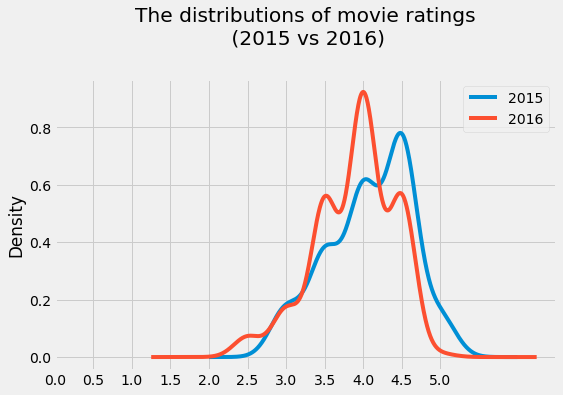

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import arange

#We will use FiveThirtyEight style
plt.style.use('fivethirtyeight')

fandango_2015["Fandango_Stars"].plot.kde(label="2015",figsize=(8,5))
fandango_2016["fandango"].plot.kde(label="2016")
plt.title("The distributions of movie ratings\n (2015 vs 2016)",y=1.1)
plt.xticks(arange(0,5.1,0.5))
plt.legend()
plt.show()

From the graph above we can observe that both distributions are left skewed, which means that Fandango's fan ratings are mostly high. It looks also that distribution for 2016 is slightly left from the distribution for 2015, which suggests the difference in rating.The popular movies in 2015 were rated slightly higher than those from 2016. Let's analyse more detailed information.

## Comparing frequency tables

Due to the fact that in both samples we have different number of movies, we will compare frequency tables of normalized values.

In [71]:
fandango_2015["Fandango_Stars"].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [54]:
fandango_2016["fandango"].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

From the frequency tables above we can observe that higher rating (4.5 and 5) was much more popular in 2015. The prefect score of 5 stars had almost 7% of movies in 2015, while in 2016 it was about 0.5%. Also the lowest rating of 2.5 stars had no movie in 2015 (the lowest rating was 3.0), while in 2016 over 3% movies had 2.5 stars. 
So far we can fave two conclusions:
- There is a difference in both distributions (difference in rating).
- The direction of change is not clear, as 4.0 and 3.5 stars were more common in 2016, but 3.0 rating was more popular in 2015.

## The direction of rating change

We will calculate some summary statistics to define the direction of rating change. For each movie rating distribution we will compute its mean, median and mode.

In [73]:
mean_2015 = fandango_2015["Fandango_Stars"].mean()
mean_2016 = fandango_2016["fandango"].mean()

median_2015 = fandango_2015["Fandango_Stars"].median()
median_2016 = fandango_2016["fandango"].median()

mode_2015 = fandango_2015["Fandango_Stars"].mode()[0]
mode_2016 = fandango_2016["fandango"].mode()[0]

summary_stats = pd.DataFrame()
summary_stats['2015'] = [mean_2015, median_2015, mode_2015]
summary_stats['2016'] = [mean_2016, median_2016, mode_2016]
summary_stats.index = ['mean', 'median', 'mode']
summary_stats

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


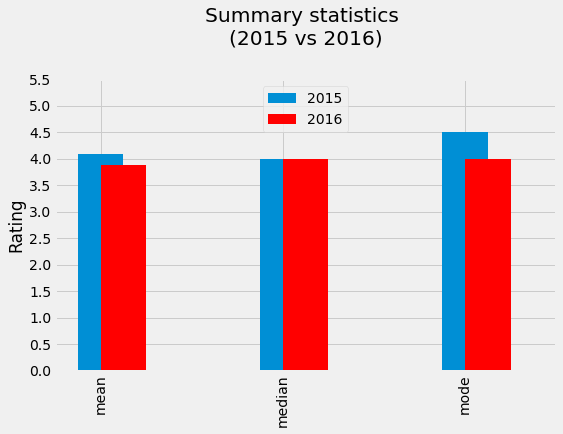

In [94]:
plt.style.use('fivethirtyeight')

summary_stats['2015'].plot.bar(align='center', label='2015', figsize=(8,5), width=0.25)
summary_stats['2016'].plot.bar(color='red',align='edge', label='2016', width=0.25)
plt.title("Summary statistics \n(2015 vs 2016)", y=1.1)
plt.legend(loc='upper center')
plt.ylabel("Rating")
plt.yticks(arange(0,6,.5))
plt.show()

The mean value is lower for 2016 by about 0.2, which is about 5%. Median is the same for both years, but mode is lower for 2016. Base on that we can say that on average the popular movies were rated lower in 2016 than in 2015. Was it because of change in rating? We can not answer for sure, but there is great chance that that was the reason.